# Part 1 – Implement Logistic Regression

In [1]:
# Package imports
import numpy as np

In [2]:
# sigmoid function as a activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# function for initialize wights and baias for Logistic Regression
def initialize_random(dim):
    W = np.random.uniform(low=-.10, high= +.10, size=(dim,1))
    b = np.random.uniform(low=-.10, high= +.1)
    
    return W,b

In [4]:
# train model for logistic Regression
def train_model(X,y,learning_rate = 0.01, max_iterations = 10000,threshold = 1e-6):
    
    W, b = initialize_random(X.shape[1]) 
    
    J_prev = 0
    dw = np.zeros_like(W)
    db = 0
    
    for i in range(max_iterations):
        random_index = np.random.randint(0,X.shape[0]-1)
        
        # forward propagation stage
        z = np.dot(X[random_index],W) + b
        y_hat = sigmoid(z)
        J_curr = -((y[random_index] * np.log10(y_hat)) + ((1-y[random_index]) * np.log10(1-y_hat)))
        if np.abs(J_curr - J_prev) < threshold:
            break
        else:
            # Backpropagation stage
            for m in range(len(W)):
                dw[m] = (y_hat - y[random_index]) * X[random_index][m]
                db = y_hat - y[random_index]
            for n in range(len(W)):
                 # Gradient Descent stage
                W[n] -= dw[n] * learning_rate
                b -= db * learning_rate
        J_prev = J_curr
    return W,b,i

### Part 2 – Test on Easy Tasks
#### Part 2A: for blobs400 dataset and Part 2B for moons500

In [5]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
##############
from sklearn.model_selection import train_test_split # use this package for divide dataset to train, validation and test
# Display plots inline and change default figure size
from sklearn.utils import shuffle # use this package for shuffleing dataset
%matplotlib inline

In [6]:
def load_dataset(name):
    # Use pandas to read the CSV file as a dataframe
    df = pd.read_csv(name)
    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values
    # The x values are all other columns
    del df['Class']   # drop the 'Class' column from the dataframe
    X = df.values     # convert the remaining columns to a numpy array
    
    return X,y

In [7]:
# divide dataset to Train set, Validation set and Test set
def divide_dataset(X,y,ratio_val,ratio_test):
    from sklearn.utils import shuffle
    X, y = shuffle(X, y)
    x_remaining, x_test, y_remaining, y_test = train_test_split(X, y, test_size=ratio_test)

    ratio_remaining = 1 - ratio_test
    ratio_val_adjusted = ratio_val / ratio_remaining

    x_train, x_val, y_train, y_val = train_test_split(
        x_remaining, y_remaining, test_size=ratio_val_adjusted)
    
    return x_train, y_train, x_val, y_val, x_test, y_test

for dataset: blobs400, Number of iterations:  2330  Test Accuracy: 0.95


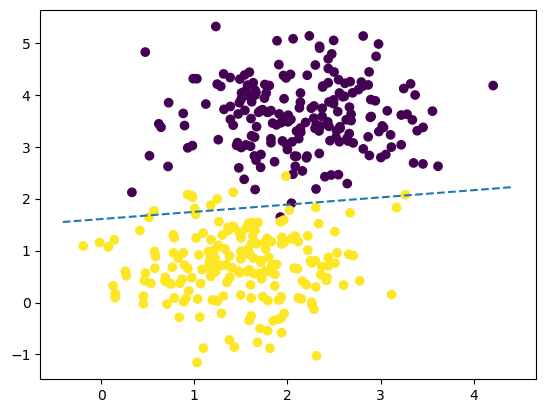

In [8]:
# load dataset bloobs400
X,y = load_dataset("blobs400.csv")
# divaide dataset to train(70%), validation(15%), test(15%)
x_train, y_train, x_val, y_val, x_test, y_test = divide_dataset(X,y,0.15,0.15)
# train on dataset and store W, b, and number of itrations
W,b,i = train_model(x_train,y_train)

# Compute accurcay y_pred for test set
y_test=y_test.reshape(y_test.shape[0],1)
y_pred = np.round(sigmoid(np.dot(x_test, W) + b))
# Compute accurcay accurcay for test set
acc = np.sum(np.equal(y_test, y_pred)) / len(y_test)


# print result of train model
print('for dataset: blobs400, Number of iterations: ',i+1,' Test Accuracy:',acc)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = -(W[0] * x_vals + b) / W[1]
plt.plot(x_vals, y_vals, '--')
plt.show()


for dataset: moons500, Number of iterations:  10000  Test Accuracy: 0.8133333333333334


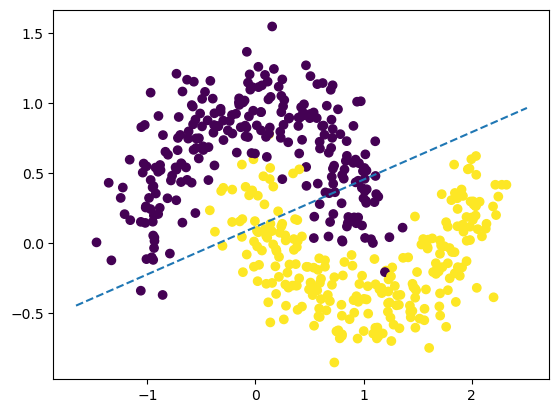

In [9]:
# load dataset moons500
X,y = load_dataset("moons500.csv")
# divaide dataset to train(70%), validation(15%), test(15%)
x_train, y_train, x_val, y_val, x_test, y_test = divide_dataset(X,y,0.15,0.15)
# train on dataset and store W, b, and number of itrations
W,b,i = train_model(x_train,y_train)

# Compute accurcay y_pred for test set
y_test=y_test.reshape(y_test.shape[0],1)
y_pred = np.round(sigmoid(np.dot(x_test, W) + b))
# Compute accurcay accurcay for test set
acc = np.sum(np.equal(y_test, y_pred)) / len(y_test)

# print result of train model
print('for dataset: moons500, Number of iterations: ',i+1,' Test Accuracy:',acc)
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = -(W[0] * x_vals + b) / W[1]
plt.plot(x_vals, y_vals, '--')
plt.show()